In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipl-2025-player-lifetime-statistics/cricket_data_2025.csv


In [2]:
# The file path you found
file_path = '/kaggle/input/ipl-2025-player-lifetime-statistics/cricket_data_2025.csv'

# Read the CSV into a pandas DataFrame
df = pd.read_csv(file_path)

In [3]:
!git config --global user.email "seshmanuvarthi27@gmail.com"
!git config --global user.name "Seshmanuvarthi"


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

df.shape

[col for col in df.columns if df[col].isnull().sum()>0] #Finding the columns if the have null values

df['Year'].fillna(int(df['Year'].mean()),inplace=True) #Filling the null columns with mean of that Column 

df['Year'].isnull().sum()

print(df['Year'])

0       2019.0
1       2024.0
2       2023.0
3       2022.0
4       2021.0
         ...  
1003    2016.0
1004    2015.0
1005    2014.0
1006    2013.0
1007    2019.0
Name: Year, Length: 1008, dtype: float64


/tmp/ipykernel_13/2534225924.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(int(df['Year'].mean()),inplace=True) #Filling the null columns with mean of that Column


In [5]:
y = df['Runs_Scored']  #Predicting Runs_Scored 
X = df[['Matches_Batted', 'Not_Outs', 'Balls_Faced', 'Batting_Strike_Rate', 'Centuries']] 

X_train, X_test, y_train, y_test = train_test_split(df.drop("Runs_Scored",axis=1),df['Runs_Scored'], test_size=0.3, random_state=42)

numeric_cols = X_train.select_dtypes(include=['int64', 'float64'])

constant_features = [col for col in numeric_cols.columns if X_train[col].std() == 0]

print(constant_features)



[]


In [6]:
df['Empty_Col']=[0]*1008

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("Runs_Scored",axis=1),df['Runs_Scored'], test_size=0.3, random_state=42)

numeric_cols = X_train.select_dtypes(include=['int64', 'float64'])

constant_features = [col for col in numeric_cols if X_train[col].std() == 0]

print(constant_features)



['Empty_Col']


In [8]:
#How to Drop The columns having constant featues 
X_train.drop(labels=constant_features,axis=1,inplace=True)

df.tail(5)

,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls,Empty_Col
1003,2016.0,Yuzvendra Chahal,13,0,0,0,0.00,0.0,0.00,0,...,295,401,21,4/25,19.09,8.15,14.04,1,0,0
1004,2015.0,Yuzvendra Chahal,15,2,1,1*,0.00,1.0,100.00,0,...,281,415,23,3/40,18.04,8.86,12.21,0,0,0
1005,2014.0,Yuzvendra Chahal,14,2,1,1*,0.00,1.0,100.00,0,...,330,386,12,2/17,32.16,7.01,27.50,0,0,0
1006,2013.0,Yuzvendra Chahal,1,0,0,0,0.00,0.0,0.00,0,...,24,34,0,0/34,0,8.5,0,0,0,0
1007,2019.0,Zeeshan Ansari,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,...,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,0


In [9]:
#Quasi_Constant features --> The Columns contains almost the same values 

quasi_constant_feature=[]
for col in X_train.columns:
    predominant=(X_train[col].value_counts()/float(len(X_train))).sort_values(ascending=False).values[0] #Calculating the frequency of highest occuuring value in that feature and dividing it wih length of the X_rain DataFrame 
    
    if predominant >0.989:
        quasi_constant_feature.append(col)

print(quasi_constant_feature)

[]


In [10]:
df.columns

Index(['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored',
       'Highest_Score', 'Batting_Average', 'Balls_Faced',
       'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes',
       'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled',
       'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match',
       'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate',
       'Four_Wicket_Hauls', 'Five_Wicket_Hauls', 'Empty_Col'],
      dtype='object')

In [11]:
#Duplicate Columns --> Two or More Columns containg exact same values for all the rows.
duplicate_Cols=[]

#Since there are no duplicate cols in our X_train We create
X_train['Empty_Col1']=[0]*705
X_train['Empty_Col2']=[0]*705

for i in range(len(X_train.columns)):
    col1=X_train.columns[i]
    for col2 in X_train.columns[i+1:]:
        if X_train[col1].equals(X_train[col2]):
            duplicate_Cols.append(col2)

X_train.drop(labels=duplicate_Cols,axis=1,inplace=True)





In [12]:
print(X_train.head())

       Year         Player_Name Matches_Batted Not_Outs Highest_Score  \
442  2024.0  Maheesh Theekshana              5        0             0   
822  2021.0         Shivam Dube              9        1           64*   
398  2016.0       Kuldeep Yadav              3        0             0   
783  2015.0      Sandeep Sharma             14        2             7   
568  2024.0       Nehal Wadhera              6        0            49   

    Batting_Average Balls_Faced Batting_Strike_Rate Centuries Half_Centuries  \
442               0         0.0                   0         0              0   
822           28.75         193              119.17         0              1   
398             0.0           0                 0.0         0              0   
783            9.00        14.0               64.28         0              0   
568           18.17          84              129.76         0              0   

     ... Balls_Bowled Runs_Conceded Wickets_Taken Best_Bowling_Match  \
442  ...

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


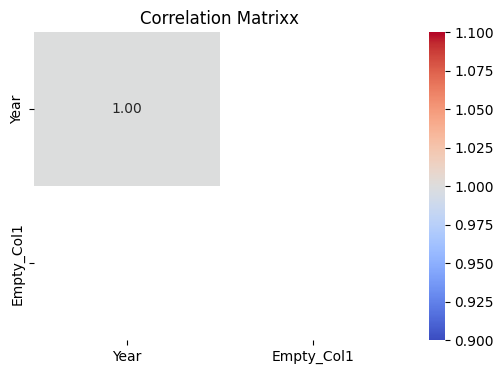

In [13]:
#Correlation --> Show How strong the pairs of features are linearly releated to each other.
import matplotlib.pyplot as plt
import seaborn as sns 

numeric_data=X_train.select_dtypes(include=['number'])
corr_matrix=numeric_data.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrixx")
plt.show()



In [14]:
print(X_train.dtypes)

Year                   float64
Player_Name             object
Matches_Batted          object
Not_Outs                object
Highest_Score           object
Batting_Average         object
Balls_Faced             object
Batting_Strike_Rate     object
Centuries               object
Half_Centuries          object
Fours                   object
Sixes                   object
Catches_Taken           object
Stumpings               object
Matches_Bowled          object
Balls_Bowled            object
Runs_Conceded           object
Wickets_Taken           object
Best_Bowling_Match      object
Bowling_Average         object
Economy_Rate            object
Bowling_Strike_Rate     object
Four_Wicket_Hauls       object
Five_Wicket_Hauls       object
Empty_Col1               int64
dtype: object
